# ЭЭГ
## Релакс и планирование
Набор данных относится к классификации двух ментальных этапов из записанных сигналов ЭЭГ: планирование (во время воображения моторного акта) и состояние Relax.
Данные:
1-12 Электроды.
13 (mental_stage) Состояние планирования или релакса.

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Читаем данные из файла.

In [158]:
data = pd.read_csv('plrx.txt', sep = '\t', engine = 'python')

Именуем столбцы.

In [159]:
data.columns = ["1", "2", "3","4", "5", "6","7", "8", "9","10", "11", "12","mental_stage","d"]
data

,1,2,3,4,5,6,7,8,9,10,11,12,mental_stage,d
0,-0.146590,-0.164940,0.249870,-0.073985,0.494940,-0.156330,-0.288910,0.500800,-0.045553,0.050759,-0.017511,0.066959,1.0,NaN
1,-0.131310,0.518160,0.432810,0.397890,0.043127,0.563200,-0.013246,-0.062833,-0.883390,-0.040303,0.088057,0.631200,2.0,NaN
2,0.649400,0.418780,0.148350,0.333490,-0.219740,0.398910,0.590650,0.077100,-1.107200,-0.367230,0.364680,0.571720,1.0,NaN
3,-0.406280,0.115030,0.073336,0.070066,-0.030920,0.152050,-0.191420,-0.580430,-0.102250,0.153750,-0.126950,0.184570,1.0,NaN
4,0.278040,0.310110,0.206630,0.055255,0.162880,0.173560,0.607320,-0.725650,-0.126460,0.339210,-0.297530,0.360240,1.0,NaN
5,-0.026340,0.262390,0.585810,0.546490,0.521440,0.213580,0.251060,-0.650320,0.269110,-0.041832,0.052720,-0.409480,2.0,NaN
6,0.281990,0.085019,0.432290,0.335620,0.495590,0.010800,0.407180,-0.337290,-0.252000,-0.741620,0.647530,-0.521110,1.0,NaN
7,0.964050,-0.003361,-0.868760,-0.760130,-0.784820,-0.216680,0.847480,0.498430,0.094435,0.146690,-0.128510,0.057451,1.0,NaN
8,0.818760,0.332390,-0.594130,-0.765170,-0.652960,0.132260,0.728830,0.452690,0.252060,-0.120980,0.103760,-0.331290,1.0,NaN
9,0.120990,-0.012491,0.237690,0.015010,0.242720,0.060151,-0.038016,-0.137110,-0.066597,0.015968,-0.002846,0.060713,2.0,NaN


Удаляем из таблицы лишний пустой столбец.

In [160]:
data.drop("d",axis=1)

,1,2,3,4,5,6,7,8,9,10,11,12,mental_stage
0,-0.146590,-0.164940,0.249870,-0.073985,0.494940,-0.156330,-0.288910,0.500800,-0.045553,0.050759,-0.017511,0.066959,1.0
1,-0.131310,0.518160,0.432810,0.397890,0.043127,0.563200,-0.013246,-0.062833,-0.883390,-0.040303,0.088057,0.631200,2.0
2,0.649400,0.418780,0.148350,0.333490,-0.219740,0.398910,0.590650,0.077100,-1.107200,-0.367230,0.364680,0.571720,1.0
3,-0.406280,0.115030,0.073336,0.070066,-0.030920,0.152050,-0.191420,-0.580430,-0.102250,0.153750,-0.126950,0.184570,1.0
4,0.278040,0.310110,0.206630,0.055255,0.162880,0.173560,0.607320,-0.725650,-0.126460,0.339210,-0.297530,0.360240,1.0
5,-0.026340,0.262390,0.585810,0.546490,0.521440,0.213580,0.251060,-0.650320,0.269110,-0.041832,0.052720,-0.409480,2.0
6,0.281990,0.085019,0.432290,0.335620,0.495590,0.010800,0.407180,-0.337290,-0.252000,-0.741620,0.647530,-0.521110,1.0
7,0.964050,-0.003361,-0.868760,-0.760130,-0.784820,-0.216680,0.847480,0.498430,0.094435,0.146690,-0.128510,0.057451,1.0
8,0.818760,0.332390,-0.594130,-0.765170,-0.652960,0.132260,0.728830,0.452690,0.252060,-0.120980,0.103760,-0.331290,1.0
9,0.120990,-0.012491,0.237690,0.015010,0.242720,0.060151,-0.038016,-0.137110,-0.066597,0.015968,-0.002846,0.060713,2.0


In [161]:
data=data.drop("d",axis = 1)


In [162]:
data

,1,2,3,4,5,6,7,8,9,10,11,12,mental_stage
0,-0.146590,-0.164940,0.249870,-0.073985,0.494940,-0.156330,-0.288910,0.500800,-0.045553,0.050759,-0.017511,0.066959,1.0
1,-0.131310,0.518160,0.432810,0.397890,0.043127,0.563200,-0.013246,-0.062833,-0.883390,-0.040303,0.088057,0.631200,2.0
2,0.649400,0.418780,0.148350,0.333490,-0.219740,0.398910,0.590650,0.077100,-1.107200,-0.367230,0.364680,0.571720,1.0
3,-0.406280,0.115030,0.073336,0.070066,-0.030920,0.152050,-0.191420,-0.580430,-0.102250,0.153750,-0.126950,0.184570,1.0
4,0.278040,0.310110,0.206630,0.055255,0.162880,0.173560,0.607320,-0.725650,-0.126460,0.339210,-0.297530,0.360240,1.0
5,-0.026340,0.262390,0.585810,0.546490,0.521440,0.213580,0.251060,-0.650320,0.269110,-0.041832,0.052720,-0.409480,2.0
6,0.281990,0.085019,0.432290,0.335620,0.495590,0.010800,0.407180,-0.337290,-0.252000,-0.741620,0.647530,-0.521110,1.0
7,0.964050,-0.003361,-0.868760,-0.760130,-0.784820,-0.216680,0.847480,0.498430,0.094435,0.146690,-0.128510,0.057451,1.0
8,0.818760,0.332390,-0.594130,-0.765170,-0.652960,0.132260,0.728830,0.452690,0.252060,-0.120980,0.103760,-0.331290,1.0
9,0.120990,-0.012491,0.237690,0.015010,0.242720,0.060151,-0.038016,-0.137110,-0.066597,0.015968,-0.002846,0.060713,2.0


Основные характеристики.

In [163]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,mental_stage
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,-0.008550,-0.002180,-0.006687,-0.011684,-0.001297,-0.004089,-0.006376,0.000571,-0.008480,-0.005979,0.004166,-0.002352,1.287293
std,0.483922,0.384654,0.343773,0.414368,0.477992,0.405167,0.459130,0.387735,0.490651,0.429532,0.344888,0.334124,0.453755
min,-2.034600,-1.004900,-0.912080,-1.107400,-1.077700,-1.072900,-1.651000,-1.023600,-1.863700,-1.604400,-0.882770,-1.087000,1.000000
25%,-0.293030,-0.233510,-0.221530,-0.264270,-0.337910,-0.235060,-0.293520,-0.239990,-0.313860,-0.233170,-0.202100,-0.193630,1.000000
50%,0.000421,-0.003361,0.003511,0.000797,-0.001633,-0.003355,0.004308,0.017011,0.034449,0.008412,-0.012979,-0.030372,1.000000
75%,0.329120,0.231020,0.215410,0.264620,0.374000,0.270000,0.289420,0.271590,0.326160,0.229970,0.210270,0.173010,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


Построим матрицу ковариаций оспользуя библиотеку pandas.

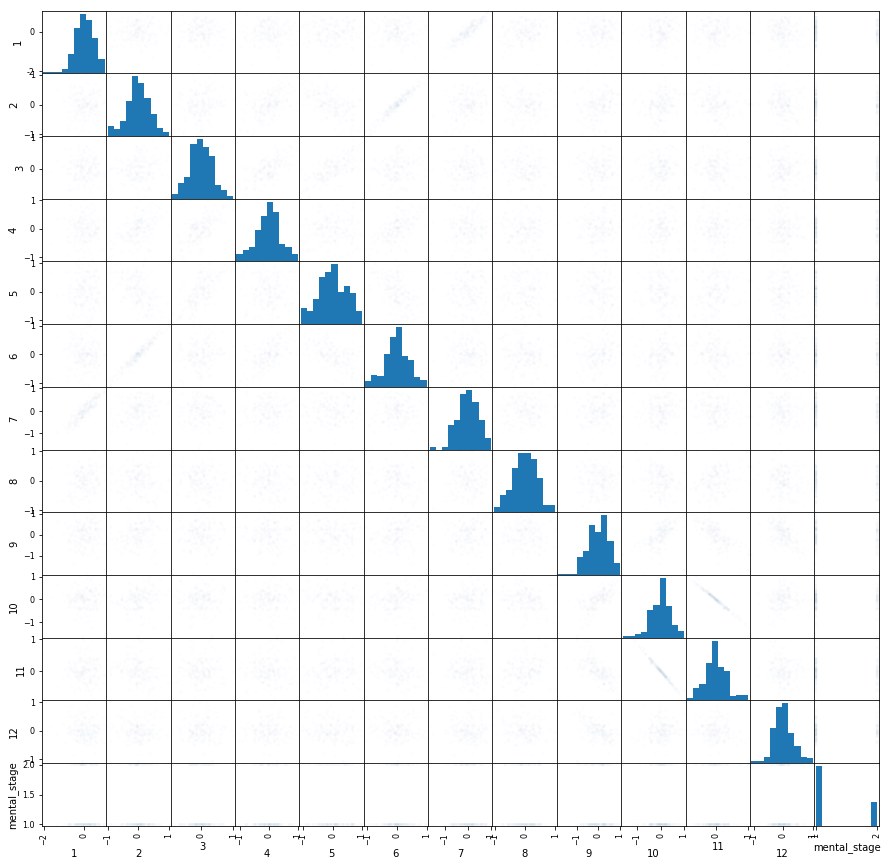

In [167]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (15, 15))
pass

Определим корреляцию параметров.

In [168]:
data.corr()

,1,2,3,4,5,6,7,8,9,10,11,12,mental_stage
1,1.000000,0.159442,-0.027207,0.025094,-0.051975,0.012709,0.907595,0.248263,0.089948,0.032788,-0.035967,-0.078722,-0.032300
2,0.159442,1.000000,0.151868,0.517777,-0.566346,0.965601,0.296215,-0.106139,0.171629,0.156208,-0.166501,-0.084279,0.015144
3,-0.027207,0.151868,1.000000,0.672747,0.671147,0.187311,0.026081,-0.133440,0.002893,-0.031086,0.031318,-0.072585,-0.012000
4,0.025094,0.517777,0.672747,1.000000,0.018940,0.603863,0.037980,-0.085657,-0.006933,-0.016202,0.011507,-0.008095,0.051026
5,-0.051975,-0.566346,0.671147,0.018940,1.000000,-0.584379,-0.036734,-0.062551,-0.069796,-0.103382,0.109000,-0.041491,-0.047557
6,0.012709,0.965601,0.187311,0.603863,-0.584379,1.000000,0.092173,-0.087013,0.132761,0.121792,-0.130149,-0.064486,0.034833
7,0.907595,0.296215,0.026081,0.037980,-0.036734,0.092173,1.000000,-0.044626,0.128189,0.147798,-0.148796,-0.023743,-0.045340
8,0.248263,-0.106139,-0.133440,-0.085657,-0.062551,-0.087013,-0.044626,1.000000,0.034297,-0.216196,0.207526,-0.233113,-0.000778
9,0.089948,0.171629,0.002893,-0.006933,-0.069796,0.132761,0.128189,0.034297,1.000000,0.687105,-0.717341,-0.456182,-0.051708
10,0.032788,0.156208,-0.031086,-0.016202,-0.103382,0.121792,0.147798,-0.216196,0.687105,1.000000,-0.988785,0.286973,-0.039188


Поскольку значения для 1 и 7 электрода лучше всех коррелируют, построим для них графики.

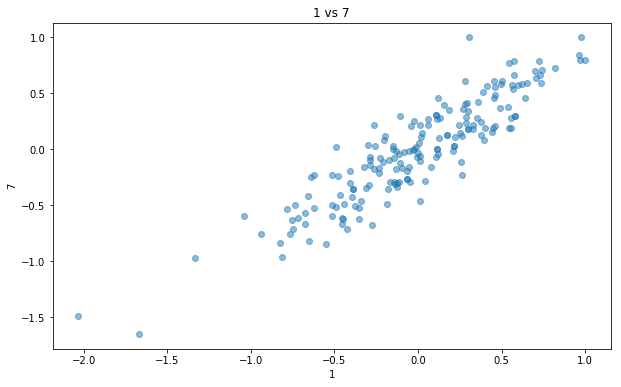

In [172]:
plt.figure(figsize = (10, 6))
plt.plot(data['1'], data['7'], 'o', alpha = 0.5)
plt.xlabel('1')
plt.ylabel('7')
plt.title('1 vs 7')
pass

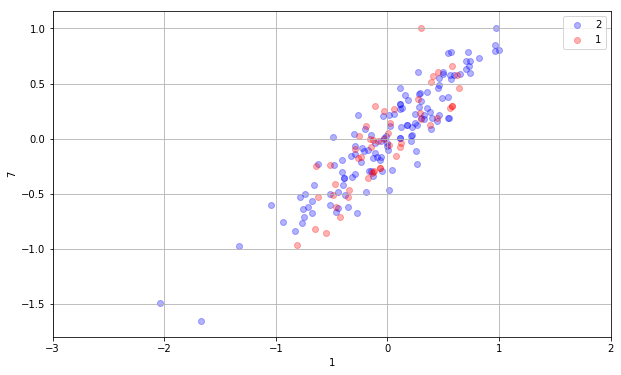

In [173]:
plt.figure(figsize = (10, 6))
plt.scatter(data[data['mental_stage'] == 1]['1'],
            data[data['mental_stage'] == 1]['7'],
            alpha = 0.3,
            label = '2',
            color = 'b')

plt.scatter(data[data['mental_stage'] == 2]['1'],
            data[data['mental_stage'] == 2]['7'],
            alpha = 0.3,
            label = '1',
            color = 'r')

plt.xlabel('1')
plt.xlim(-3, 2)
plt.ylabel('7')
plt.legend()
plt.grid()

Выведем параметры столбцов с типом float.

In [174]:
data.describe(include = ['float'])

,1,2,3,4,5,6,7,8,9,10,11,12,mental_stage
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,-0.008550,-0.002180,-0.006687,-0.011684,-0.001297,-0.004089,-0.006376,0.000571,-0.008480,-0.005979,0.004166,-0.002352,1.287293
std,0.483922,0.384654,0.343773,0.414368,0.477992,0.405167,0.459130,0.387735,0.490651,0.429532,0.344888,0.334124,0.453755
min,-2.034600,-1.004900,-0.912080,-1.107400,-1.077700,-1.072900,-1.651000,-1.023600,-1.863700,-1.604400,-0.882770,-1.087000,1.000000
25%,-0.293030,-0.233510,-0.221530,-0.264270,-0.337910,-0.235060,-0.293520,-0.239990,-0.313860,-0.233170,-0.202100,-0.193630,1.000000
50%,0.000421,-0.003361,0.003511,0.000797,-0.001633,-0.003355,0.004308,0.017011,0.034449,0.008412,-0.012979,-0.030372,1.000000
75%,0.329120,0.231020,0.215410,0.264620,0.374000,0.270000,0.289420,0.271590,0.326160,0.229970,0.210270,0.173010,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


Выведем параметры всех столбцов.

In [175]:
data.describe(include = 'all')

,1,2,3,4,5,6,7,8,9,10,11,12,mental_stage
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,-0.008550,-0.002180,-0.006687,-0.011684,-0.001297,-0.004089,-0.006376,0.000571,-0.008480,-0.005979,0.004166,-0.002352,1.287293
std,0.483922,0.384654,0.343773,0.414368,0.477992,0.405167,0.459130,0.387735,0.490651,0.429532,0.344888,0.334124,0.453755
min,-2.034600,-1.004900,-0.912080,-1.107400,-1.077700,-1.072900,-1.651000,-1.023600,-1.863700,-1.604400,-0.882770,-1.087000,1.000000
25%,-0.293030,-0.233510,-0.221530,-0.264270,-0.337910,-0.235060,-0.293520,-0.239990,-0.313860,-0.233170,-0.202100,-0.193630,1.000000
50%,0.000421,-0.003361,0.003511,0.000797,-0.001633,-0.003355,0.004308,0.017011,0.034449,0.008412,-0.012979,-0.030372,1.000000
75%,0.329120,0.231020,0.215410,0.264620,0.374000,0.270000,0.289420,0.271590,0.326160,0.229970,0.210270,0.173010,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


Определяем уникальные значения в столбце "mental_stage".

In [176]:
data['mental_stage'].unique()

array([ 1.,  2.])

# Решаем поставленную задачу классификации.

## Подготавливаем данные 

Определим тип mental_stage.

In [177]:
data['mental_stage'].dtype.name

'float64'

Разделим столбцы на numerical_columns и categorical_columns.

In [178]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'mental_stage']


### Посмотрим есть ли пропущенные значения.

Если они будут, заполним их медианными значениями.

In [179]:
data.median(axis = 0)

1               0.000421
2              -0.003361
3               0.003511
4               0.000797
5              -0.001633
6              -0.003355
7               0.004308
8               0.017011
9               0.034449
10              0.008412
11             -0.012979
12             -0.030372
mental_stage    1.000000
dtype: float64

In [180]:
data = data.fillna(data.median(axis = 0), axis = 0)

пропущенных данных больше нет.

### Векторизация данных.

In [181]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,mental_stage
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,-0.008550,-0.002180,-0.006687,-0.011684,-0.001297,-0.004089,-0.006376,0.000571,-0.008480,-0.005979,0.004166,-0.002352,1.287293
std,0.483922,0.384654,0.343773,0.414368,0.477992,0.405167,0.459130,0.387735,0.490651,0.429532,0.344888,0.334124,0.453755
min,-2.034600,-1.004900,-0.912080,-1.107400,-1.077700,-1.072900,-1.651000,-1.023600,-1.863700,-1.604400,-0.882770,-1.087000,1.000000
25%,-0.293030,-0.233510,-0.221530,-0.264270,-0.337910,-0.235060,-0.293520,-0.239990,-0.313860,-0.233170,-0.202100,-0.193630,1.000000
50%,0.000421,-0.003361,0.003511,0.000797,-0.001633,-0.003355,0.004308,0.017011,0.034449,0.008412,-0.012979,-0.030372,1.000000
75%,0.329120,0.231020,0.215410,0.264620,0.374000,0.270000,0.289420,0.271590,0.326160,0.229970,0.210270,0.173010,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [182]:
data_core = data['mental_stage'];
data_numerical = data_numerical.drop(('mental_stage'), axis = 1)
data_numerical.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,-0.008550,-0.002180,-0.006687,-0.011684,-0.001297,-0.004089,-0.006376,0.000571,-0.008480,-0.005979,0.004166,-0.002352
std,0.483922,0.384654,0.343773,0.414368,0.477992,0.405167,0.459130,0.387735,0.490651,0.429532,0.344888,0.334124
min,-2.034600,-1.004900,-0.912080,-1.107400,-1.077700,-1.072900,-1.651000,-1.023600,-1.863700,-1.604400,-0.882770,-1.087000
25%,-0.293030,-0.233510,-0.221530,-0.264270,-0.337910,-0.235060,-0.293520,-0.239990,-0.313860,-0.233170,-0.202100,-0.193630
50%,0.000421,-0.003361,0.003511,0.000797,-0.001633,-0.003355,0.004308,0.017011,0.034449,0.008412,-0.012979,-0.030372
75%,0.329120,0.231020,0.215410,0.264620,0.374000,0.270000,0.289420,0.271590,0.326160,0.229970,0.210270,0.173010
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Нормализация данных.

In [183]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02
mean,-2.760223e-17,6.440520e-17,1.012082e-17,7.667286e-18,-3.879647e-17,4.224675e-17,-5.765799e-17,-1.226766e-17,1.594796e-17,-2.330855e-17,1.717472e-17,2.453532e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.186731e+00,-2.606810e+00,-2.633697e+00,-2.644309e+00,-2.251924e+00,-2.637953e+00,-3.582040e+00,-2.641420e+00,-3.781141e+00,-3.721307e+00,-2.571661e+00,-3.246247e+00
25%,-5.878634e-01,-6.013974e-01,-6.249572e-01,-6.095703e-01,-7.042216e-01,-5.700646e-01,-6.254078e-01,-6.204268e-01,-6.223979e-01,-5.289264e-01,-5.980660e-01,-5.724761e-01
50%,1.853955e-02,-3.069725e-03,2.966272e-02,3.011897e-02,-7.019461e-04,1.809938e-03,2.327010e-02,4.239958e-02,8.749388e-02,3.350498e-02,-4.971186e-02,-8.386061e-02
75%,6.977788e-01,6.062595e-01,6.460568e-01,6.668080e-01,7.851537e-01,6.764831e-01,6.442531e-01,6.989794e-01,6.820328e-01,5.493168e-01,5.975960e-01,5.248422e-01
max,2.084119e+00,2.605407e+00,2.928349e+00,2.441512e+00,2.094798e+00,2.478209e+00,2.191918e+00,2.577608e+00,2.055392e+00,2.342035e+00,2.887409e+00,2.999944e+00


### Объединим данные в одной таблице. 

In [184]:
data = pd.concat((data_numerical, data_core), axis = 1)
data.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,mental_stage
count,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02,181.000000
mean,-2.760223e-17,6.440520e-17,1.012082e-17,7.667286e-18,-3.879647e-17,4.224675e-17,-5.765799e-17,-1.226766e-17,1.594796e-17,-2.330855e-17,1.717472e-17,2.453532e-18,1.287293
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.453755
min,-4.186731e+00,-2.606810e+00,-2.633697e+00,-2.644309e+00,-2.251924e+00,-2.637953e+00,-3.582040e+00,-2.641420e+00,-3.781141e+00,-3.721307e+00,-2.571661e+00,-3.246247e+00,1.000000
25%,-5.878634e-01,-6.013974e-01,-6.249572e-01,-6.095703e-01,-7.042216e-01,-5.700646e-01,-6.254078e-01,-6.204268e-01,-6.223979e-01,-5.289264e-01,-5.980660e-01,-5.724761e-01,1.000000
50%,1.853955e-02,-3.069725e-03,2.966272e-02,3.011897e-02,-7.019461e-04,1.809938e-03,2.327010e-02,4.239958e-02,8.749388e-02,3.350498e-02,-4.971186e-02,-8.386061e-02,1.000000
75%,6.977788e-01,6.062595e-01,6.460568e-01,6.668080e-01,7.851537e-01,6.764831e-01,6.442531e-01,6.989794e-01,6.820328e-01,5.493168e-01,5.975960e-01,5.248422e-01,2.000000
max,2.084119e+00,2.605407e+00,2.928349e+00,2.441512e+00,2.094798e+00,2.478209e+00,2.191918e+00,2.577608e+00,2.055392e+00,2.342035e+00,2.887409e+00,2.999944e+00,2.000000


### Зададим X и y.

In [185]:
X = data.drop(('mental_stage'), axis = 1)
y = data['mental_stage']
feature_names = X.columns

In [186]:
type(feature_names)

pandas.core.indexes.base.Index

In [187]:
feature_names

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

In [188]:
print(X.shape)
print(y.shape)
N, d = X.shape

(181, 12)
(181,)


In [189]:
type(X)

pandas.core.frame.DataFrame

In [190]:
type(y)

pandas.core.series.Series

### Получим обучающие и тестовые выборки.

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

126 55


## kNN
Объявляем классификатор с параметром $k$ = 15. Обучаем модели на обучающей выборке X_train, y_train

In [192]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [193]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

Считаем среднюю ошибку.

In [194]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.277777777778 0.309090909091


In [195]:
err_test = 1 - knn.score(X_test, y_test)

In [196]:
err_test

0.30909090909090908

С помощью метода confusion matrix вычисляем точность работы классификатора. Элемент матрицы (i, j) будет равен числу объектов из группы i, а предсказанных в группу j

In [197]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[37  1]
 [16  1]]


### Осуществляем подбор параметров
Получаем что оптимальный(по величине ошибки) $k$=10.

In [198]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.269841269841 10


Проведем классификацию и посчитаем ошибки при данном параметре $k$

In [199]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.269841269841 0.345454545455


## Нейронные сети
На исходном наборе данных с помощью нейронных сетей решим задачу классификации.

Разбиваем данные на обучающую и тестовую выборки

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

Обучение классификатора вида многослойного персептрона. Активационная функций: логистическая сигмоидальная f(x) = 1 / (1 + exp(-x)). Один скрытый слой с 5-ю нейронами

In [225]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (5), solver = 'lbfgs', activation = 'logistic', random_state = 24)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=24, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Предсказывается идентификатор инструктора и проверяется качество классификатора на основании его ошибки на тестовой и обучающей выборках

In [226]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.148760330579 0.383333333333


Так как ошибка на тестовой выборке выше, чем на обучающей, значит наблюдается переобучение. Увеличим количество нейронов на скрытом слое.

In [227]:
mlp_model = MLPClassifier(hidden_layer_sizes = (20), solver = 'lbfgs', activation = 'logistic', random_state = 24)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=24, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [228]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.3


Перебрав количество нейронов от 10 до 100 замечаем, что наименьшая ошибка наблюдается при количестве нейронов равном 20.Теперь попробуем использовать персептрон с двумя скрытыми слоями

In [229]:
mlp_model = MLPClassifier(hidden_layer_sizes = (40, 9), solver = 'lbfgs', activation = 'logistic', random_state = 24)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=24, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [230]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.3


При проведении тестов не найдена ситуация, где не наблюдалось бы переобучение. Наименьшая ошибка наблюдается при количестве нейронов (40, 9) на двух скрытых слоях.

## Подбор гиперпараметров

### Подбор количества нейронов в скрытых слоях

Построим график зависимости ошибок от количества нейронов в скрытом слое (1 скрытый слой)

Минимальная ошибка:
0.0 0.216666666667
Оптимальное количество нейронов:
33


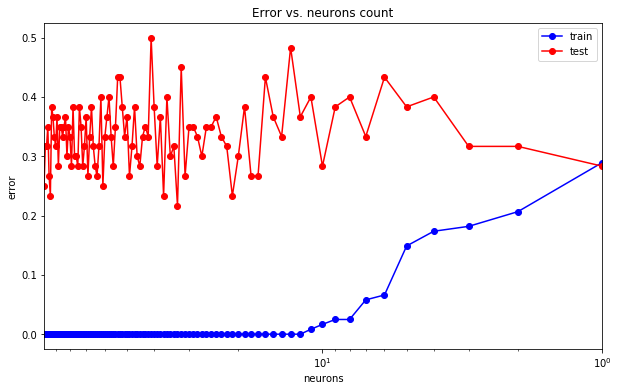

In [231]:
neurs_arr_1 = np.arange(1, 100, 1)
test_err = []
train_err = []
for neurs in neurs_arr_1:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neurs,), solver = 'lbfgs',
                              activation = 'logistic', random_state = 24)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

print("Минимальная ошибка:")
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

print("Оптимальное количество нейронов:")
neurs_opt_1 = neurs_arr_1[test_err == min_test_err][0]
print(neurs_opt_1)

plt.figure(figsize = (10, 6))
plt.semilogx(neurs_arr_1, train_err, 'b-o', label = 'train')
plt.semilogx(neurs_arr_1, test_err, 'r-o', label = 'test')
plt.xlim([np.max(neurs_arr_1), np.min(neurs_arr_1)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()
pass

Для оптимальной конфигурации нейронов наблюдается переобучение.

Построим график зависимости ошибок от количества нейронов в скрытых слоях (2 скрытых слоя с одинаковым количеством нейронов).

Минимальная ошибка:
0.0 0.25
Оптимальное количество нейронов:
68


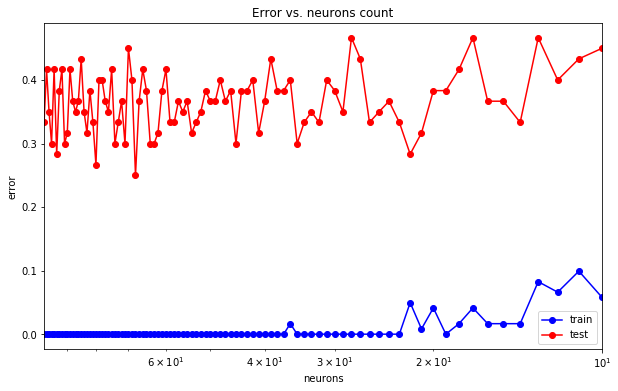

In [232]:
neurs_arr_2 = np.arange(10, 100, 1)
test_err = []
train_err = []
for neurs in neurs_arr_2:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neurs, neurs), solver = 'lbfgs',
                              activation = 'logistic', random_state = 24)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

print("Минимальная ошибка:")
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

print("Оптимальное количество нейронов:")
neurs_opt_2 = neurs_arr_2[test_err == min_test_err][0]
print(neurs_opt_2)

plt.figure(figsize = (10, 6))
plt.semilogx(neurs_arr_2, train_err, 'b-o', label = 'train')
plt.semilogx(neurs_arr_2, test_err, 'r-o', label = 'test')
plt.xlim([np.max(neurs_arr_2), np.min(neurs_arr_2)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()
pass

Так же наблюдается переобучение. Однако ошибка меньше на конфигурации с однослойной нейронной сетью с 33 нейронами, значит будем использовать такую конфигурацию.

### Подбор параметра регуляризации alpha

Минимальная ошибка:
0.0 0.183333333333
Оптимальное значение alpha:
1e-05


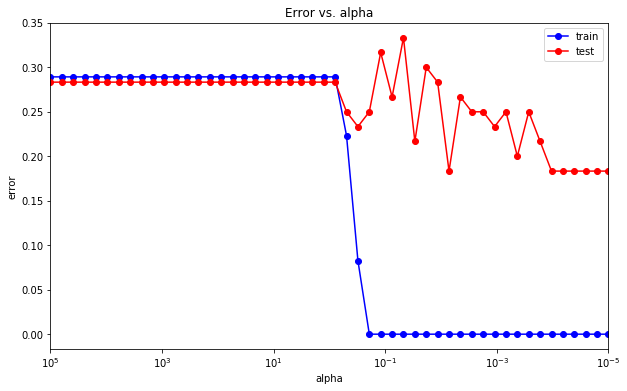

In [233]:
alpha_arr = np.logspace(-5, 5, 50)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (neurs_opt_1,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 24)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

print("Минимальная ошибка:")
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

print("Оптимальное значение alpha:")
alpha_opt = alpha_arr[test_err == min_test_err][0]
print(alpha_opt)

plt.figure(figsize = (10, 6))
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

### Классификатор на найденных оптимальных значениях

In [234]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neurs_opt_1,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 24)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print("Ошибки на обучающей и тестовой выборках:")
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

Ошибки на обучающей и тестовой выборках:
0.0 0.183333333333


Проблему переобучения устранить не удалось, но удалось максимально снизить ошибку. Оптимальная конфигурация: alpha = 1e-05 , нейронная сеть из одного слоя (33)